# Notebook de démonstration du fonctionnement du package workforce_scheduling

## Installation des dépendances

On vous propose d'installer les dépendances du package à partir de la cellule suivante si ce n'est toujours pas fait.

In [1]:
! pip install ..

Processing /Users/gilliankeusch/Desktop/cours_3A_CS/2_période/Systèmes de décision/projet/dev/workforce_scheduling
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for workforce-scheduling: filename=workforce_scheduling-0.1.0-py3-none-any.whl size=17281 sha256=8958ecc8cd5e2c92713f8f9f29d774362a8a13cd6997bf3ac6da4adc191a4d88
  Stored in directory: /private/var/folders/19/pckvwjyn0r7630jpjn3lh1800000gn/T/pip-ephem-wheel-cache-l9lh_wzb/wheels/1b/c7/ba/1fe69bc47d4e7cb52d93f4bca8c8fb52babd34cdc9ceb39b3d
Succ

## Quelques imports utiles

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np
from workforce_scheduling.utils import get_schedule_from_npz
from workforce_scheduling.plot import plot_pareto_surface, plot_schedule
from workforce_scheduling.preferences.uta import run_uta
from workforce_scheduling.preferences.minmax_ranking import run_kbest
from workforce_scheduling.plot import plot_classification

## Résolution sur des instances

On propose de déterminer les solutions non-dominées sur deux instances :
- l'instance du fichier `example/data_example/medium_instance.json`
- une instance générée par le script `./scripts/generate_instances.py` accessible depuis `example/data_example/instances_16/instance_0.json`

La cellule suivante recherche les solutions non-dominées pour ces deux instances. La cellule prend un certain temps à s'exécuter (de l'ordre de 1 à 2 heures). 

Les solutions ont été précalculées et sont disponibles dans les fichiers `example/solved_example/instances_16/instance_0/instance_0_pareto.csv` et `example/solved_example/medium_instance/medium_instance_pareto.csv`.

In [ ]:
! python -m workforce_scheduling solve --data-path=./data_example/medium_instance.json
! python -m workforce_scheduling solve --data-path=./data_example/instances_16/instance_0.json

## Visualisation de solutions

### Surfaces de Pareto

Surface de Pareto de l'instance `medium.json`.

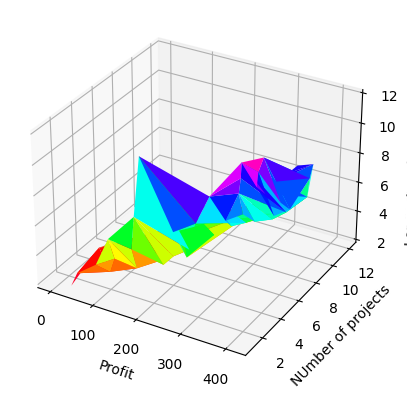

In [3]:
medium_pareto_df = pd.read_csv(Path("./solved_example/medium_instance/medium_instance_pareto.csv"))
plot_pareto_surface(medium_pareto_df)

Surface de Pareto de l'instance `instance_0.json`

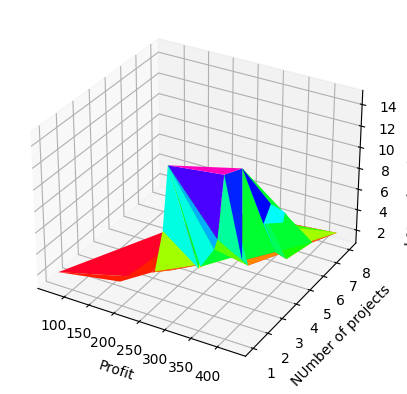

In [4]:
generated_pareto_df = pd.read_csv(Path("./solved_example/instances_16/instance_0/instance_0_pareto.csv"))
plot_pareto_surface(generated_pareto_df)

### Exemples d'emplois du temps

La cellule suivante affiche un emploi du temps possible pour l'instance `medium_instance.json`. Pour cette solution, le profit est de 411, le nombre maximal de projets par employé est de 6 et la durée du plus long projet s'élève à 10 jours.

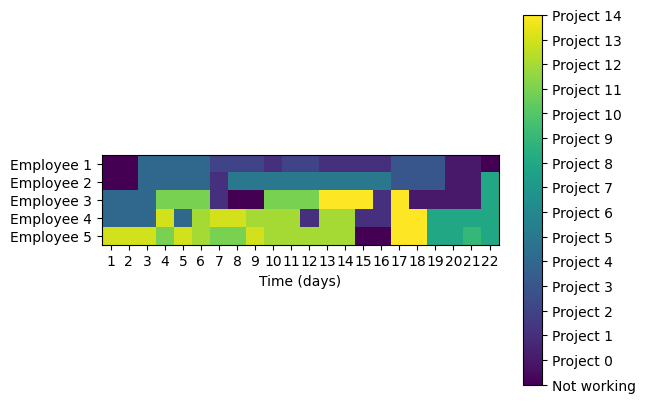

In [5]:
medium_schedule = get_schedule_from_npz(Path("./solved_example/medium_instance/workforce_scheduling34761.npz"))
plot_schedule(medium_schedule)

La cellule d'après montre un emploi du temps possible pour l'instance générée `instance_0.json`. Pour ce planning, le profit est de 427, le nombre maximal de projets par employé est de 6 et la durée du projet le plus long est de 4 jours.

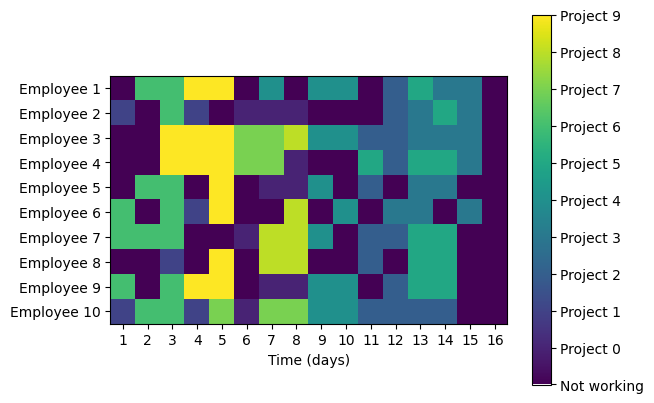

In [6]:
generated_schedule = get_schedule_from_npz(Path("./solved_example/instances_16/instance_0/workforce_scheduling72229.npz"))
plot_schedule(generated_schedule)

## Méthodes de préférences :

## UTA

In [7]:
# On classifie nos instances selon les deux méthodes présentées dans le rapport :
path1 = Path("./solved_example/medium_instance/medium_instance_pareto.csv")
path2 = Path("./solved_example/medium_instance/preorder_medium_instance.csv")
selection= run_uta(path1,path2)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-12-30
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Intel(R) Core(TM) i7-5650U CPU @ 2.20GHz
Thread count: 2 physical cores, 4 logical processors, using up to 4 threads

Optimize a model with 21 rows, 25 columns and 96 nonzeros
Model fingerprint: 0x0fe511da
Coefficient statistics:
  Matrix range     [1e-02, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e-03, 1e+00]
Presolve removed 11 rows and 9 columns
Presolve time: 0.06s
Presolved: 10 rows, 19 columns, 45 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    0.0000000e+00   2.224146e+00   0.000000e+00      0s
       5    0.0000000e+00   0.000000e+00   0.000000e+00      0s

Solved in 5 iterations and 0.08 seconds (0.00 work units)
Optimal objective  0.000000000e+00
Gurobi Optimizer version 10.0.0 build v10.0.0rc2 (mac64[x86])

CPU model: Inte

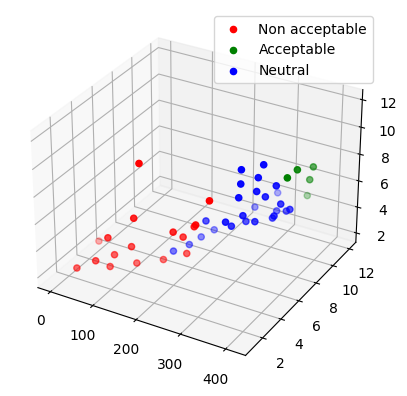

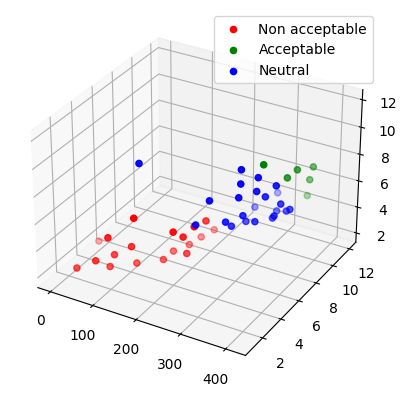

In [8]:
# On affiche en 3D la répartition des classes :
path3 = Path("./solved_example/medium_instance/Classification_instances_coeff_appris.csv")
path4 = Path("./solved_example/medium_instance/Classification_instances.csv")
medium_classification_df_learnt = pd.read_csv(path3)
medium_classification_df= pd.read_csv(path4)
plot_classification(medium_classification_df)
plot_classification(medium_classification_df_learnt)

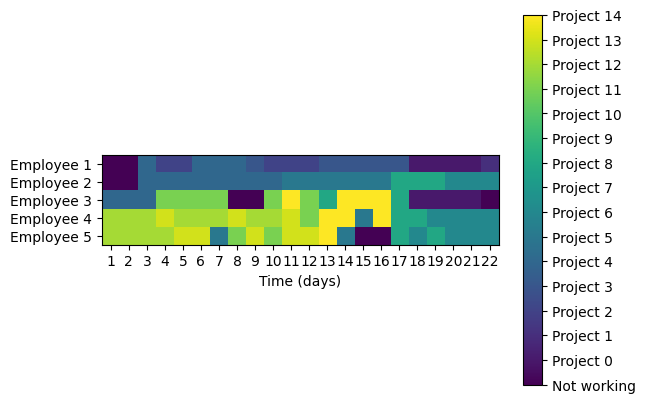

In [9]:
#On affiche un emploi du temps qui est Acceptable :
medium_schedule = get_schedule_from_npz(Path("./solved_example/medium_instance/workforce_scheduling92632.npz"))
plot_schedule(medium_schedule)

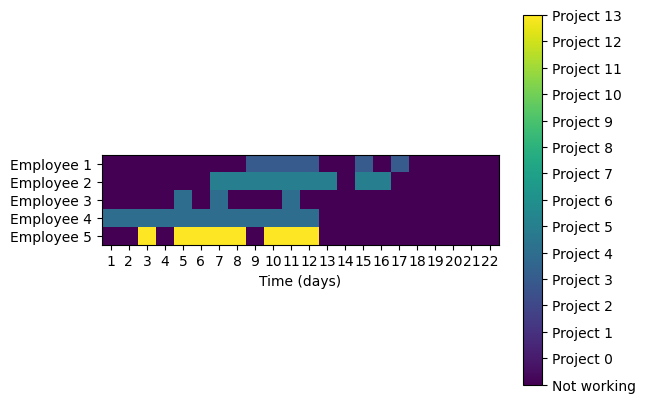

In [10]:
#On affiche un emploi du temps qui est Neutre :
medium_schedule = get_schedule_from_npz(Path("./solved_example/medium_instance/workforce_scheduling23984.npz"))
plot_schedule(medium_schedule)

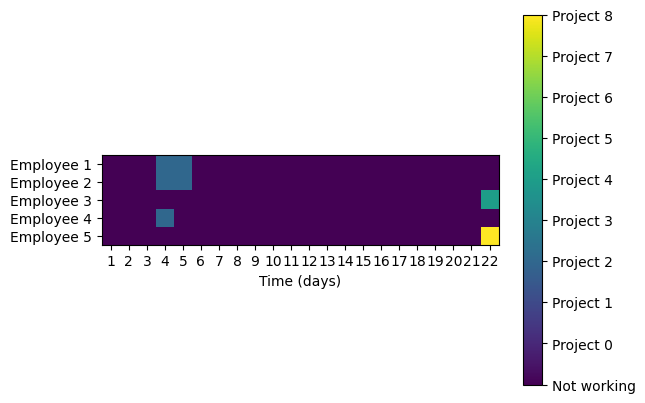

In [11]:
#On affiche un emploi du temps qui est Non acceptable :
medium_schedule = get_schedule_from_npz(Path("./solved_example/medium_instance/workforce_scheduling95712.npz"))
plot_schedule(medium_schedule)

### Xtreme Ranking

In [41]:
# On affiche en 3D la répartition des classes :
CATEGORY_MAPPING = {
    "refused": "Non acceptable",
    "unknown": "Neutral",
    "validated": "Acceptable"
}

medium_instance_pareto_path = Path("./solved_example/medium_instance/medium_instance_pareto.csv")
preorder_medium_instance_path = Path("./solved_example/medium_instance/preorder_medium_instance.csv")

In [42]:
result = run_kbest(
    medium_instance_pareto_path,
    preorder_medium_instance_path,
    accepted_worse_rank=10,
    refused_best_rank=20
)
   

{'refused': array([[30.,  1.,  2.],
       [45.,  1.,  3.],
       [ 0.,  5.,  2.]]), 'unknown': array([[339.,   3.,   8.],
       [274.,  12.,   4.],
       [372.,   3.,  12.]]), 'validated': array([[411.,   6.,  10.],
       [413.,   7.,  10.]])}
[[ 30.   1.   2.]
 [ 45.   1.   3.]
 [ 90.   1.   4.]
 [120.   1.   6.]
 [180.   1.   8.]
 [194.   1.  12.]
 [ 99.   2.   3.]
 [110.   2.   4.]
 [150.   2.   5.]
 [245.   2.   7.]
 [295.   2.   8.]
 [325.   2.  10.]
 [138.   3.   3.]
 [245.   3.   6.]
 [270.   3.   7.]
 [339.   3.   8.]
 [367.   3.  10.]
 [371.   3.  11.]
 [372.   3.  12.]
 [177.   4.   3.]
 [231.   4.   4.]
 [331.   4.   7.]
 [356.   4.   8.]
 [385.   4.  10.]
 [399.   4.  12.]
 [388.   4.  11.]
 [178.   5.   3.]
 [  0.   5.   2.]
 [253.   5.   6.]
 [362.   5.   7.]
 [384.   5.   9.]
 [407.   5.  10.]
 [193.   6.   3.]
 [322.   6.   6.]
 [384.   6.   7.]
 [398.   6.   8.]
 [411.   6.  10.]
 [199.   7.   3.]
 [361.   7.   6.]
 [399.   7.   7.]
 [413.   7.  10.]
 [208.   8.  

calculating max_rank: 100%|███████████████████████████████████████████████| 49/49 [00:00<00:00, 187.69it/s]


In [43]:
CATEGORY_MAPPING = {
    "refused": "Non acceptable",
    "unknown": "Neutral",
    "validated": "Acceptable"
}
result["class"] = result.category.apply(lambda x: CATEGORY_MAPPING[x])

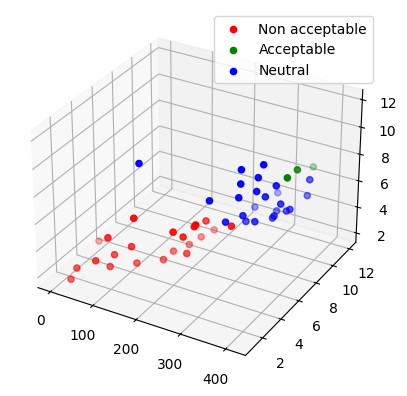

In [44]:
plot_classification(result.drop(["category", "path"], axis=1))

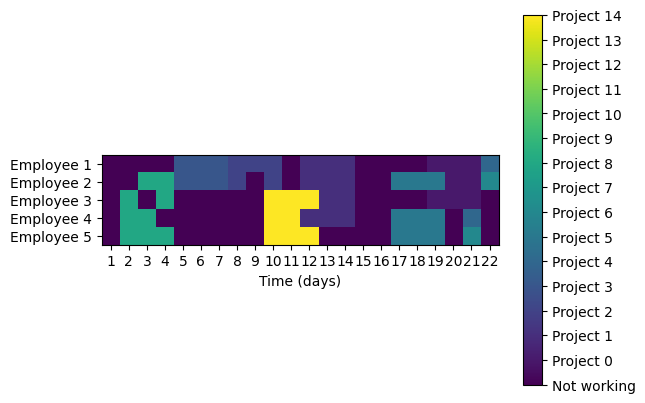

In [46]:
#On affiche un emploi du temps qui est Non Acceptable :
schedule_path = result[result["class"] == "Non acceptable"].sample(1).iloc[0].path
medium_schedule = get_schedule_from_npz(Path("./solved_example/medium_instance/") / Path(schedule_path).name)
plot_schedule(medium_schedule)

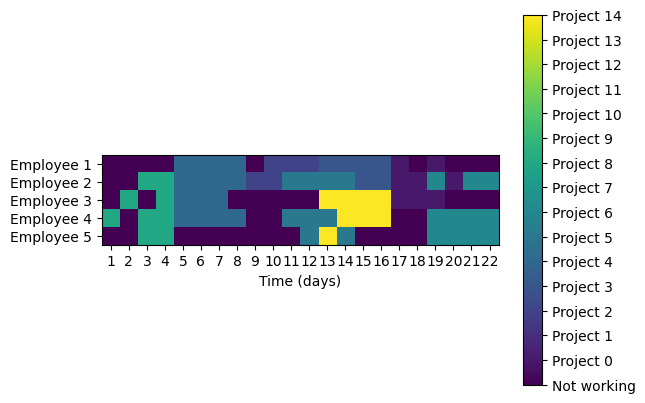

In [47]:
#On affiche un emploi du temps qui est Neutre :
schedule_path = result[result["class"] == "Neutral"].sample(1).iloc[0].path
medium_schedule = get_schedule_from_npz(Path("./solved_example/medium_instance/") / Path(schedule_path).name)
plot_schedule(medium_schedule)

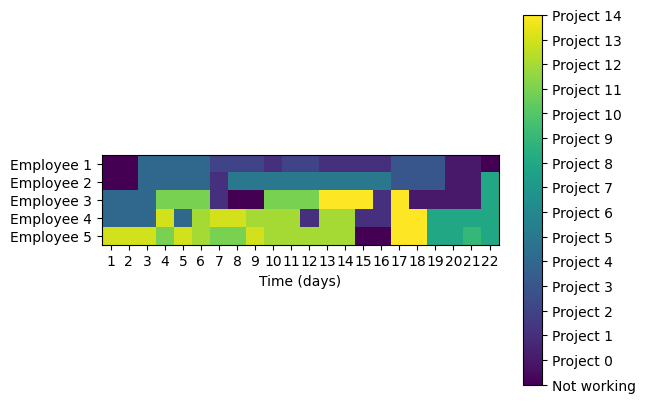

In [48]:
#On affiche un emploi du temps qui est Acceptable :
schedule_path = result[result["class"] == "Acceptable"].sample(1).iloc[0].path
medium_schedule = get_schedule_from_npz(Path("./solved_example/medium_instance/") / Path(schedule_path).name)
plot_schedule(medium_schedule)